In [12]:
import numpy as np
import pandas as pd
import mlflow
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from urllib.parse import urlparse

In [13]:
x_train = pd.read_csv('../data/split/train/x_train.csv',index_col=0)
y_train = pd.read_csv('../data/split/train/y_train.csv',index_col=0)

x_test = pd.read_csv('../data/split/test/x_test.csv',index_col=0)
y_test = pd.read_csv('../data/split/test/y_test.csv',index_col=0)

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [8]:
models_dic = dict(

    linear = LinearRegression(),
    lasso = Lasso(random_state=5,alpha=0.2),
    ridge = Ridge(random_state=5,alpha=0.5),
    rf = RandomForestRegressor(max_depth=10,min_samples_split=2,
                               random_state=5),
    ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,min_samples_split=2,
                               random_state=5),random_state=5),
    gb = GradientBoostingRegressor(max_depth=10,min_samples_leaf=2,
                                  random_state=5),
    tree = DecisionTreeRegressor(max_depth=15,random_state=5),
    neigh = KNeighborsRegressor(n_neighbors=13),
    linearsvm = LinearSVR(random_state=5,C=0.5,epsilon=0.2),
    #svm = SVR()

)

In [5]:
experiment = {
'number':[],
    'metrics' :[]

}


In [6]:
metric = {
    'name': [],
    'train_mse':[],
    'train_mae':[],
    'train_r2' : [],
    'train_rmse':[],
    'test_mse':[],
    'test_mae':[],
    'test_r2' : [],
    'test_rmse':[],
    'metrics':[]
    

}

In [7]:
# run : mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0
# server : http://0.0.0.0:5000
remote_server_uri = 'http://0.0.0.0:5000'
mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment('restaurant7')


2022/12/29 02:27:14 INFO mlflow.tracking.fluent: Experiment with name 'restaurant7' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/774803706839969484', creation_time=1672261034960, experiment_id='774803706839969484', last_update_time=1672261034960, lifecycle_stage='active', name='restaurant7', tags={}>

In [9]:
for keys in models_dic.keys():
    
    number = 1
    mlflow.sklearn.autolog()
    with mlflow.start_run(run_name=keys):
        
        print(keys,"\n")
        lr = models_dic[keys]
        lr.fit(x_train,y_train)
        
        metric['metrics'].append(lr.get_params())
        y_train_pred = lr.predict(x_train)
        y_test_pred = lr.predict(x_test)
        
        mse_train = mean_squared_error(y_train,y_train_pred)
        mae_train = mean_absolute_error(y_train,y_train_pred)
        
        mse_test = mean_squared_error(y_test,y_test_pred)
        mae_test = mean_absolute_error(y_test,y_test_pred)
        
        r2_train =r2_score(y_train,y_train_pred)
        r2_test = r2_score(y_test,y_test_pred)
        
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        
        
        metric['name'].append(keys)
        metric['train_mse'].append(mse_train)
        metric['test_mse'].append(mse_test)
        metric['train_mae'].append(mae_train)
        metric['test_mse'].append(mae_test)
        metric['train_r2'].append(r2_train)
        metric['test_r2'].append(r2_test)
        metric['train_rmse'].append(rmse_train)
        metric['test_rmse'].append(rmse_test)
        
        mlflow.log_metric('train_mse',mse_train)
        mlflow.log_metric('test_mse',mse_test)
        mlflow.log_metric('train_mae',mae_train)
        mlflow.log_metric('test_mae',mae_test)
        mlflow.log_metric('train_r2',r2_train)
        mlflow.log_metric('test_r2',r2_test)
        mlflow.log_metric('train_rmse',rmse_train)
        mlflow.log_metric('test_rmse',rmse_test)
        
      
       
        mlflow.sklearn.log_model(lr, "model")
        
        print(f' train = mse : {mse_train} mae : {mae_train} r2 : {r2_train} \n \
                test = mse : {mse_test} mae : {mae_test} r2 : {r2_test} ')
        print("================================================================")
        
experiment['number'].append(number)
experiment['metrics'].append(metric)

2022/12/29 02:30:21 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Cmd('git') failed due to: exit code(1)
  cmdline: git version
  stderr: 'xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.'


linear 



2022/12/29 02:30:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


 train = mse : 0.07804743368387873 mae : 0.20078302960235664 r2 : 0.5916809246863175 
                 test = mse : 0.08298500852408149 mae : 0.20473000644178632 r2 : 0.5860407000126586 
lasso 



2022/12/29 02:30:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


 train = mse : 0.1520564669641754 mae : 0.3015614903363699 r2 : 0.20448946165538995 
                 test = mse : 0.160223469676195 mae : 0.3074980893270784 r2 : 0.2007472611218265 
ridge 



2022/12/29 02:30:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


 train = mse : 0.07805752606482656 mae : 0.20085450794844528 r2 : 0.5916281245946062 
                 test = mse : 0.08283527466074668 mae : 0.20462295143309067 r2 : 0.5867876267932046 
rf 



2022/12/29 02:31:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py:533: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()."
2022/12/29 02:33:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer c

 train = mse : 0.03880535349146819 mae : 0.13966976418155636 r2 : 0.7969828691737013 
                 test = mse : 0.05268357099279741 mae : 0.16045603381764129 r2 : 0.737195253011475 
ada 



/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2022/12/29 02:34:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Ha

 train = mse : 0.1287276926390979 mae : 0.2962110220537805 r2 : 0.32653810708810727 
                 test = mse : 0.1296721046431239 mae : 0.29581681522618886 r2 : 0.353148543084433 
gb 



/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2022/12/29 02:37:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handli

 train = mse : 0.009873864178183145 mae : 0.0687731399968115 r2 : 0.9483431177591505 
                 test = mse : 0.028446524808385148 mae : 0.10754592095610742 r2 : 0.8580984239661257 
tree 



2022/12/29 02:37:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


 train = mse : 0.01828357077732563 mae : 0.07090883252730183 r2 : 0.9043462371425555 
                 test = mse : 0.05380119237556974 mae : 0.1268517850192557 r2 : 0.7316201524783581 
neigh 



2022/12/29 02:38:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


 train = mse : 0.05647508299913117 mae : 0.16953572271097891 r2 : 0.7045405264461386 
                 test = mse : 0.07145380879966903 mae : 0.19003812133583126 r2 : 0.6435625036592388 
linearsvm 



/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
2022/12/29 02:39:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realis

 train = mse : 0.07971366685242783 mae : 0.19866315350400657 r2 : 0.5829637285592206 
                 test = mse : 0.08458553429103963 mae : 0.20211861512221158 r2 : 0.5780566973851307 


In [16]:
#run: mlflow ui

In [15]:
#experiment

In [15]:
import xgboost as xgb

In [13]:
boost = xgb.XGBRegressor(n_estimators=100,max_depth=10,reg_lambda=3,reg_alpha=2)

In [14]:
boost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=2,
             reg_lambda=3, ...)

In [18]:
y_pred = boost.predict(x_test)
r2_score(y_test,y_pred)

0.8727651513495669

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.1597070318104302

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS

In [24]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [25]:
cross = cross_val_score(xgb.XGBRegressor(n_estimators=100,max_depth=10,reg_lambda=3,reg_alpha=2),
                       x_train,y_train,cv=5,scoring='r2')

In [26]:
cross

array([0.84466283, 0.8475287 , 0.84138651, 0.85000773, 0.85240295])

In [27]:
from sklearn.decomposition import PCA,IncrementalPCA

In [40]:
pca = PCA(0.98)
pca.fit(x_train)

2022/12/29 05:32:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: RESOURCE_DOES_NOT_EXIST: No Experiment with id=774803706839969484 exists


PCA(n_components=0.98)

In [41]:
sum(pca.explained_variance_ratio_)

0.9800571987360844

In [42]:
len(pca.explained_variance_ratio_)

184

In [46]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [45]:
from sklearn.model_selection import cross_validate,cross_val_predict

In [ ]:
cross_val_predict()

In [47]:
model = xgb.XGBRegressor(n_estimators=100,max_depth=10,reg_lambda=3,reg_alpha=2)
cross = cross_val_score(model,
                       x_train_pca,y_train,cv=5,scoring='r2')

In [48]:
cross

array([0.78033326, 0.77757385, 0.77541992, 0.77609908, 0.7760005 ])

In [14]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [18]:
m = [('gb',GradientBoostingRegressor(max_depth=10)),('rf',RandomForestRegressor(max_depth=10)),
      ('neigh',KNeighborsRegressor(n_neighbors=10)),
     ]

In [19]:
v = VotingRegressor(m)

In [20]:
v.fit(x_train,y_train)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(max_depth=10)),
                            ('rf', RandomForestRegressor(max_depth=10)),
                            ('neigh', KNeighborsRegressor(n_neighbors=10))])

In [21]:
pred = v.predict(x_test)
r2_score(y_test,pred)

0.7988718391722823

In [35]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [36]:
params = dict(

n_estimators=[50,100],
max_depth=[10,12],
reg_lambda=[3,5],
reg_alpha=[2,5]



)

In [37]:
grid = GridSearchCV(xgb.XGBRFRegressor(),params,scoring='r2',cv=5,return_train_score=True)

In [38]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_to_onehot=None,
                                      max_delta_step=None, max...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_paralle

In [39]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 100, 'reg_alpha': 2, 'reg_lambda': 3}

In [40]:
grid.best_score_

0.4664888451298418

In [42]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.881411,1.716647,0.106043,0.010017,10,50,2,3,"{'max_depth': 10, 'n_estimators': 50, 'reg_alp...",0.481667,...,0.466134,0.011981,3,0.489238,0.473551,0.473095,0.449670,0.483932,0.473897,0.013592
1,10.859351,0.318780,0.100874,0.011879,10,50,2,5,"{'max_depth': 10, 'n_estimators': 50, 'reg_alp...",0.461842,...,0.452725,0.008876,11,0.469988,0.458081,0.461813,0.441330,0.464888,0.459220,0.009759
2,10.248973,0.751470,0.114804,0.011810,10,50,5,3,"{'max_depth': 10, 'n_estimators': 50, 'reg_alp...",0.463053,...,0.452936,0.008851,9,0.470706,0.456722,0.461595,0.441506,0.465071,0.459120,0.009917
3,8.679311,1.202495,0.083581,0.022403,10,50,5,5,"{'max_depth': 10, 'n_estimators': 50, 'reg_alp...",0.448861,...,0.442171,0.006664,15,0.457075,0.446552,0.455039,0.436435,0.446820,0.448384,0.007327
4,47.460619,17.276428,0.169574,0.076693,10,100,2,3,"{'max_depth': 10, 'n_estimators': 100, 'reg_al...",0.478983,...,0.466489,0.010110,1,0.485523,0.468795,0.466689,0.459556,0.489122,0.473937,0.011407
5,21.317006,6.456960,0.093892,0.027930,10,100,2,5,"{'max_depth': 10, 'n_estimators': 100, 'reg_al...",0.461585,...,0.453076,0.007409,7,0.468558,0.454331,0.456084,0.449120,0.467276,0.459074,0.007586
6,19.635057,5.201823,0.093721,0.035311,10,100,5,3,"{'max_depth': 10, 'n_estimators': 100, 'reg_al...",0.462311,...,0.453427,0.007282,5,0.468838,0.453096,0.456213,0.449870,0.467555,0.459114,0.007693
7,21.489025,3.910703,0.101935,0.024528,10,100,5,5,"{'max_depth': 10, 'n_estimators': 100, 'reg_al...",0.447604,...,0.442383,0.004683,13,0.454993,0.443805,0.449879,0.443767,0.448824,0.448254,0.004202
8,8.601368,1.995299,0.086221,0.020639,12,50,2,3,"{'max_depth': 12, 'n_estimators': 50, 'reg_alp...",0.481667,...,0.466134,0.011981,3,0.489238,0.473551,0.473095,0.449670,0.483932,0.473897,0.013592
9,13.383447,0.439073,0.125768,0.030084,12,50,2,5,"{'max_depth': 12, 'n_estimators': 50, 'reg_alp...",0.461842,...,0.452725,0.008876,11,0.469988,0.458081,0.461813,0.441330,0.464888,0.459220,0.009759


In [45]:
pred = grid.best_estimator_.predict(x_test)
r2_score(y_test,pred)

0.47984424914136725

In [4]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

In [5]:
m = [('gb',GradientBoostingRegressor(max_depth=10)),('rf',RandomForestRegressor(max_depth=10)),
      ('neigh',KNeighborsRegressor(n_neighbors=10))]

In [10]:
stack = StackingRegressor(estimators=m,
            final_estimator=xgb.XGBRegressor(n_estimators=100,
            max_depth=10,reg_lambda=3,reg_alpha=2),
                          cv=5
            )

In [15]:
stack.fit(x_train,y_train)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('gb', GradientBoostingRegressor(max_depth=10)),
                              ('rf', RandomForestRegressor(max_depth=10)),
                              ('neigh', KNeighborsRegressor(n_neighbors=10))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categoric...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               le

In [17]:
pred = stack.predict(x_test)
r2_score(y_test,pred)

0.8642685916504569

In [30]:
mlp = MLPRegressor( hidden_layer_sizes=(124,6),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,)

In [31]:
mlp.fit(x_train,y_train)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(batch_size=32, hidden_layer_sizes=(124, 6))

In [32]:
pred = mlp.predict(x_test)
r2_score(y_test,pred)

0.8157690482484795

In [62]:
# plot tree
from sklearn.tree import plot_tree,export_text,export_graphviz

In [47]:
models_dic = dict(

    rf = RandomForestRegressor(max_depth=10,min_samples_split=2,
                               random_state=5),
  
    gb = GradientBoostingRegressor(max_depth=10,min_samples_leaf=2,
                                  random_state=5),
    tree = DecisionTreeRegressor(max_depth=15,random_state=5),
  
)

In [56]:
models_dic['gb'].fit(x_train,y_train)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=10, min_samples_leaf=2, random_state=5)

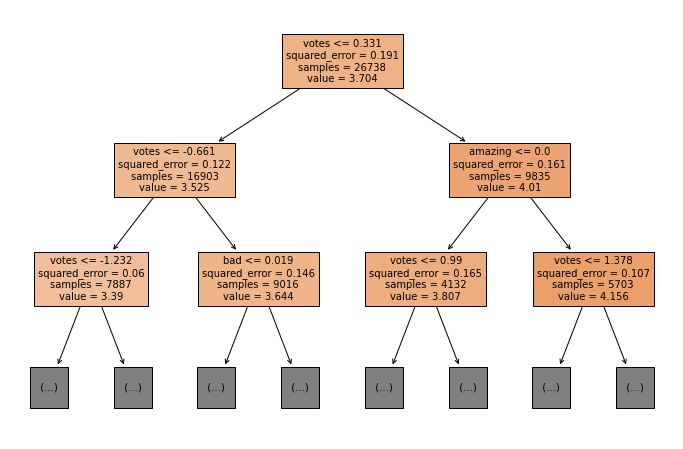

In [53]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
plot_tree(models_dic['tree'],max_depth=2,feature_names=x_train.columns,filled=True,fontsize=10,ax=ax)
plt.show()

In [61]:
t = export_text(models_dic['tree'],feature_names=list(x_train.columns),max_depth=2)
print(t)

|--- votes <= 0.33
|   |--- votes <= -0.66
|   |   |--- votes <= -1.23
|   |   |   |--- truncated branch of depth 13
|   |   |--- votes >  -1.23
|   |   |   |--- truncated branch of depth 13
|   |--- votes >  -0.66
|   |   |--- bad <= 0.02
|   |   |   |--- truncated branch of depth 13
|   |   |--- bad >  0.02
|   |   |   |--- truncated branch of depth 13
|--- votes >  0.33
|   |--- amazing <= 0.00
|   |   |--- votes <= 0.99
|   |   |   |--- truncated branch of depth 13
|   |   |--- votes >  0.99
|   |   |   |--- truncated branch of depth 13
|   |--- amazing >  0.00
|   |   |--- votes <= 1.38
|   |   |   |--- truncated branch of depth 13
|   |   |--- votes >  1.38
|   |   |   |--- truncated branch of depth 13



In [74]:
from graphviz import Source

t = export_graphviz(models_dic['tree'],feature_names=list(x_train.columns),max_depth=2)


In [90]:
#Source(t)

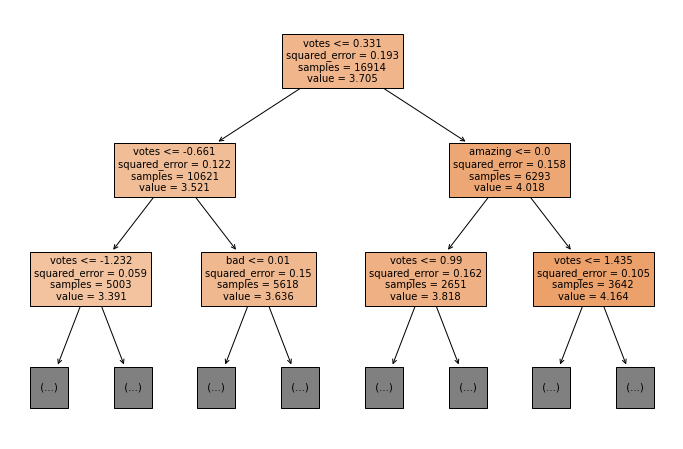

In [55]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
plot_tree(models_dic['rf'].estimators_[0],max_depth=2,feature_names=x_train.columns,filled=True,fontsize=10,ax=ax)
plt.show()

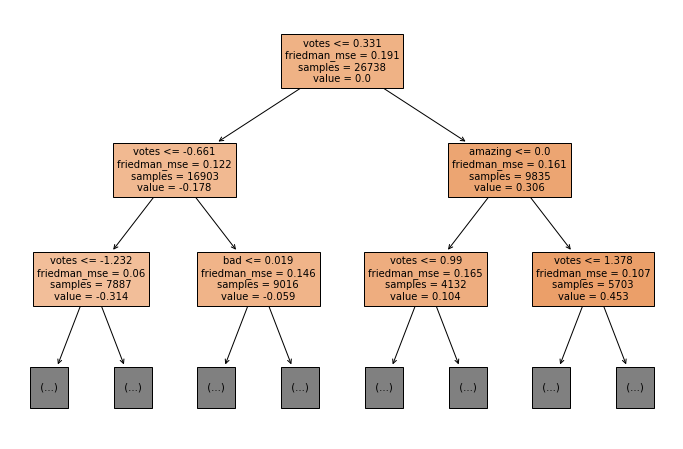

In [67]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,8))
plot_tree(models_dic['gb'].estimators_[0][0],max_depth=2,feature_names=x_train.columns,filled=True,fontsize=10,ax=ax)
plt.show()

In [68]:
boost = xgb.XGBRegressor(n_estimators=100,max_depth=10,reg_lambda=3,reg_alpha=2)
boost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=2,
             reg_lambda=3, ...)

In [89]:
#xgb.plot_tree(boost)

In [72]:
boost

In [75]:
# prediction

pred = boost.predict(x_test)
r2_score(y_test,pred)

0.8727651513495669

In [76]:
pred = models_dic['gb'].predict(x_test)
r2_score(y_test,pred)

0.8580984239661257

In [77]:
# Saving best models

import os

os.mkdir('best_model/')

In [78]:
boost.save_model('best_model/xgboost')

In [80]:
mod = xgb.XGBRegressor()
mod.load_model('best_model/xgboost')

pred = mod.predict(x_test)
r2_score(y_test,pred)

0.8727651513495669

In [81]:
import joblib

joblib.dump(models_dic['gb'],'best_model/gradboost.pkl')

['best_model/gradboost.pkl']

In [82]:
mod = joblib.load('best_model/gradboost.pkl')
pred = mod.predict(x_test)
r2_score(y_test,pred)

0.8580984239661257

In [83]:
# feature importance

boost.feature_importances_

array([4.44388203e-03, 4.37865295e-02, 4.80833650e-02, 4.14049439e-03,
       1.19529170e-04, 3.55266850e-04, 6.05428708e-04, 5.20529633e-04,
       2.22811796e-04, 1.18014088e-03, 1.82031340e-03, 1.94615175e-04,
       0.00000000e+00, 1.22507662e-02, 3.21383565e-03, 7.00256834e-03,
       1.76581386e-02, 2.26913462e-03, 5.82136039e-04, 0.00000000e+00,
       0.00000000e+00, 2.46448535e-03, 3.61316488e-04, 0.00000000e+00,
       0.00000000e+00, 1.45725312e-03, 0.00000000e+00, 3.67008848e-03,
       4.73328633e-03, 8.16068932e-05, 0.00000000e+00, 1.59188407e-04,
       0.00000000e+00, 0.00000000e+00, 1.13409944e-03, 4.79683001e-03,
       2.54652300e-03, 1.87823724e-03, 1.85903686e-03, 0.00000000e+00,
       2.09825055e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.57178365e-04, 0.00000000e+00, 0.00000000e+00, 5.80984808e-04,
       3.50694987e-03, 0.00000000e+00, 7.61509873e-04, 6.66546077e-03,
       0.00000000e+00, 4.79458412e-03, 2.07914338e-02, 0.00000000e+00,
      

In [84]:
models_dic['gb'].feature_importances_

array([1.87367551e-03, 4.27872934e-03, 4.23186837e-01, 1.50799319e-02,
       1.01267754e-04, 4.80943863e-05, 1.50994285e-04, 5.20204648e-05,
       1.66990885e-04, 7.05637308e-06, 9.35678986e-09, 8.69952136e-05,
       0.00000000e+00, 3.76259228e-04, 1.33373362e-04, 0.00000000e+00,
       9.40478620e-04, 1.75671461e-04, 1.31643850e-04, 0.00000000e+00,
       3.03977145e-05, 0.00000000e+00, 6.78305721e-05, 0.00000000e+00,
       1.43773682e-07, 6.50576612e-06, 0.00000000e+00, 6.98447364e-04,
       2.97547564e-05, 0.00000000e+00, 1.58055952e-05, 3.83898179e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.44320896e-03,
       3.31292492e-04, 2.71326636e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.42367439e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09746961e-04,
       8.35528558e-04, 0.00000000e+00, 0.00000000e+00, 8.37184085e-04,
       0.00000000e+00, 3.53524670e-05, 1.90190719e-04, 0.00000000e+00,
      

In [4]:
from sklearn.decomposition import (MiniBatchSparsePCA,KernelPCA,
                                   IncrementalPCA,PCA)

In [94]:
ipca = IncrementalPCA(105)

In [95]:
ipca.fit(x_train)

IncrementalPCA(n_components=105)

In [97]:
sum(ipca.explained_variance_ratio_)

0.9339770668244046

In [98]:
mpca = MiniBatchSparsePCA(100)
mpca.fit(x_train)

MiniBatchSparsePCA(n_components=100)

In [99]:
mpca.transform(x_train).shape

(26738, 100)

In [101]:
# kpca = KernelPCA(100)
# kpca.fit(x_train)

In [6]:
from sklearn.manifold import TSNE,MDS
                                                

In [7]:
pca = IncrementalPCA(n_components=50)

pca.fit(x_train)

IncrementalPCA(n_components=50)

In [8]:
x = pca.transform(x_train)
x.shape

(26738, 50)

In [10]:
# tsne = TSNE()


# tsne.fit(x)

In [60]:
x_train.reset_index(drop=True,inplace=True)

In [64]:
y_train

,rate
0,4.0
1,3.5
2,4.2
3,3.8
4,4.2
...,...
26733,3.3
26734,3.5
26735,3.5
26736,3.1


In [65]:
# MINI BATCH GRADIENT DESCENT FOR XGBOOST

batch=5000
model = None
y_train.index = x_train.index

j = batch
for i in range(0,len(x_train),batch):
    
    if j>len(x_train):
        j = len(x_train)-1
    
    x = x_train.iloc[i:j]
    y = y_train.iloc[i:j]
    
    # model = xgb.train(params={'max_depth':10,,'n_estimator'=50,
    #                          'reg_lambda':2})
    
    model = xgb.train(params = dict(objective='reg:squarederror',n_estimators=100,max_depth=15, \
                               reg_lambda=3,reg_alpha=2 ,verbosity=0
                               ),
                     dtrain=xgb.DMatrix(x,y),
                     xgb_model = model)
                      

In [66]:
pred = model.predict(xgb.DMatrix(x_test))
r2_score(y_test,pred)

0.5429915608783591

In [57]:
# MINI BATCH GRADIENT DESCENT FOR XGBOOST

batch=5000
model = None
y_train.index = x_train.index

j = batch
for i in range(0,len(x_train),batch):
    
    x = x_train.iloc[i:j]
    y = y_train.iloc[i:j]
    
    # model = xgb.train(params={'max_depth':10,,'n_estimator'=50,
    #                          'reg_lambda':2})
    
    model = xgb.XGBRegressor(n_estimators=100,max_depth=10,
                               reg_lambda=3,reg_alpha=2
                               ,xgb_model=model,verbosity=0)
    
    model.fit(x,y)

In [58]:
pred = model.predict(x_test)
r2_score(y_test,pred)

-50.94977842195259